<a href="https://colab.research.google.com/github/NasreddineG/Machine-Learning/blob/main/Detections_Emotions_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'objectif du projet est de construire à l'aide d'un CNN (Convolution Neural Network ou réseau neuronal convolutif) une reconnaissance des émotions sur des images.

Pour ce faire, il nous faut une base d'apprentissage et d'entraînement. Pour cela, nous allons utiliser pour ça le dataset FER-2013 disponible sur Kaggle (https://www.kaggle.com/msambare/fer2013).

Ce dataset est constitué d'images de visages en niveaux de gris de 48x48 pixels. Les images sont plus ou moins centrés et occupent à peu près le même espace.

Il existe 7 émotions différentes dans ces dataset et chaque visages appartient à l'une des 7 émotions suivantes :

- La colère

- Le dégoût

- La peur

- La joie

- La tristesse

- La surprise

- Neutre

.

.

. /!\ Le GPU doit être sélectionné comme accélérateur matériel pour la bonne exécution.

Pour importer le dataset zippé sur collab, il faut l'importer dans un premier temps sur votre drive et connecter votre colab à votre drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Une fois cette connexion réalisée, on va dézipper le fichier se trouvant sur le drive. 


Cette commande est à exécuter uniquement lors de la première importation du fichier, par la suite le dataset dézippé est définitivement stocké sur votre Drive.

In [ ]:
!unzip /content/drive/MyDrive/Data/archive.zip -d /content/drive/MyDrive/Data/dataset

On réalise les importations nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

import cv2 as cv
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Les noms des classes pour connaitre les 7 émotions
Class_name_train=os.listdir("/content/drive/MyDrive/Data/dataset/train")
print('train =', Class_name_train)
Class_name_test=os.listdir("/content/drive/MyDrive/Data/dataset/test")
print('test =', Class_name_test)

train = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
test = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


                         ********************************sad*************************


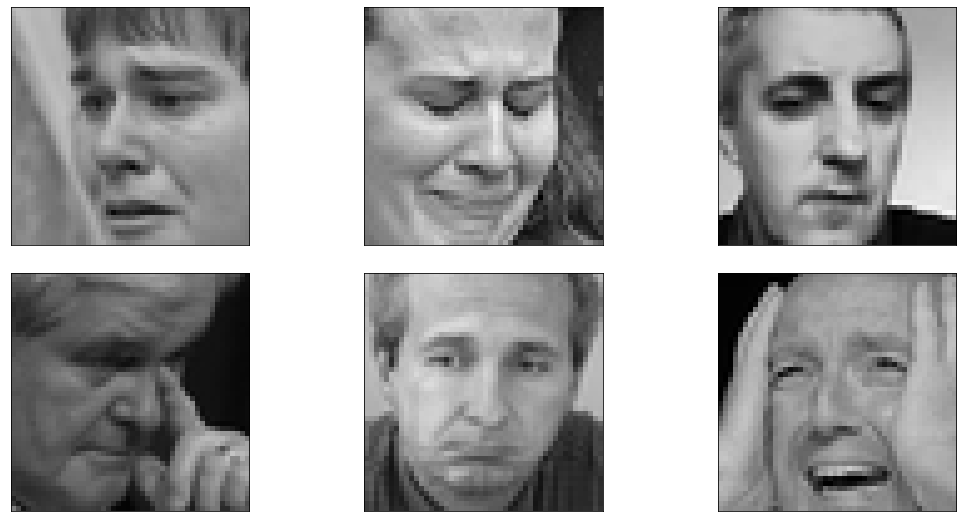

In [ ]:
#  Plot 12 images aléatoires pour vérifier l'ensemble des données
plt.figure(figsize=(15,11))
n= np.random.randint(0,7)
path = f"/content/drive/MyDrive/Data/dataset/train/{Class_name_train[n]}"
print(f"                         ********************************{Class_name_train[n]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

CLASSIFICATION DES DONNÉES :

Analysons les jeux de données que nous avons pour voir les proportions des différentes classes et la répartition entre le dataset train et test.

<BarContainer object of 7 artists>

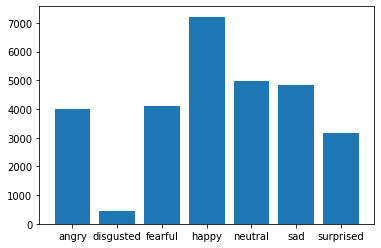

In [ ]:
#Classification test
train_count=[]
for i in Class_name_test:
    train_count.append(len(os.listdir("/content/drive/MyDrive/Data/dataset/train/"+i+"/")))
plt.bar(Class_name_train,train_count)

<BarContainer object of 7 artists>

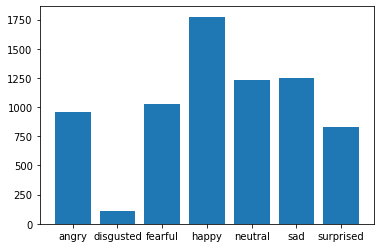

In [ ]:
#Classification test
train_count=[]
for i in Class_name_test:
    train_count.append(len(os.listdir("/content/drive/MyDrive/Data/dataset/test/"+i+"/")))
plt.bar(Class_name_test,train_count)

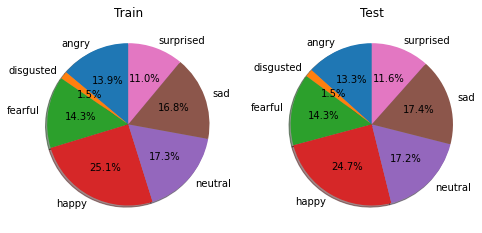

Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : surprised
	Training : 3171
	 Testing : 831


In [ ]:
train_path = "/content/drive/MyDrive/Data/dataset/train"
test_path = "/content/drive/MyDrive/Data/dataset/test"

x_train = np.array([ len(os.listdir(train_path+'/'+i+'/')) for i in Class_name_train ])
x_test = np.array([ len(os.listdir(test_path+'/'+i+'/')) for i in Class_name_test ])
label = Class_name_train
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in Class_name_train:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_path+'/'+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_path+'/'+i+'/'))))

On remarque que les pourcentages pour chaque émotion sont un peu près similaire entre le test et le train.

Ainsi, les données sont cohérentes et peuvent être analysées. 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

print("Train:")
train_generator = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Data/dataset/train",
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical")

print("\nTest:")
test_generator = test_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Data/dataset/test",
                                                              target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical")


Train:
Found 28709 images belonging to 7 classes.

Test:
Found 7178 images belonging to 7 classes.


L'ensemble d'entraînement comprend 28 709 images tandis que l'ensemble de test lui en comprend 7 178.

Ce qui est logique pour permettre de bien entraîner le modèle avant de le tester. Cependant, les proportions pour chaque émotion sont similaires ce qui est le plus important pour avoir un résultat réaliste et optimal.

In [ ]:
CNN= Sequential()
CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(128,(3,3),padding='same',activation='relu'))
CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))
     

CNN.add(Flatten()) 

CNN.add(Dense(100,activation = 'relu'))

CNN.add(Dense(50,activation = 'relu'))

CNN.add(Dense(225,activation = 'relu'))

CNN.add(BatchNormalization())
CNN.add(Dropout(0.25))

CNN.add(Dense(7, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

/!\ Avant de lancer le CNN, vérifiez que vous êtes en GPU. 

In [ ]:
#Vérification que collab utilise le GPU
with tf.device("/device:GPU:0"):
  device_name = tf.test.gpu_device_name()
  print(device_name)
  if device_name == '/device:GPU:0':
    print("ok")
  else : 
    print("NON")

  CNN.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.0005),metrics=['accuracy'])
  history=CNN.fit_generator(train_generator, steps_per_epoch=28709 // 64, epochs=50, validation_data=test_generator, validation_steps=7178 // 64)


/device:GPU:0
ok
Epoch 1/50
448/448 [==============================] - 54s 118ms/step - loss: 0.0853 - accuracy: 0.9710 - val_loss: 1.9207 - val_accuracy: 0.6230
Epoch 2/50
448/448 [==============================] - 54s 120ms/step - loss: 0.0798 - accuracy: 0.9739 - val_loss: 1.9150 - val_accuracy: 0.6293
Epoch 3/50
448/448 [==============================] - 61s 136ms/step - loss: 0.0760 - accuracy: 0.9742 - val_loss: 1.9842 - val_accuracy: 0.6267
Epoch 4/50
448/448 [==============================] - 53s 119ms/step - loss: 0.0803 - accuracy: 0.9724 - val_loss: 1.9248 - val_accuracy: 0.6236
Epoch 5/50
448/448 [==============================] - 54s 120ms/step - loss: 0.0736 - accuracy: 0.9754 - val_loss: 2.0008 - val_accuracy: 0.6169
Epoch 6/50
448/448 [==============================] - 54s 119ms/step - loss: 0.0744 - accuracy: 0.9745 - val_loss: 1.9614 - val_accuracy: 0.6208
Epoch 7/50
448/448 [==============================] - 53s 118ms/step - loss: 0.0721 - accuracy: 0.9763 - val_loss

In [ ]:
CNN.evaluate(test_generator)

113/113 [==============================] - 12s 106ms/step - loss: 2.1941 - accuracy: 0.6239


[2.1941075325012207, 0.6238506436347961]

On remarque que la précisoon de notre modèle après avoir exécuté 50 époques est de 62%.


Analysons de plus près ces résultats ! 

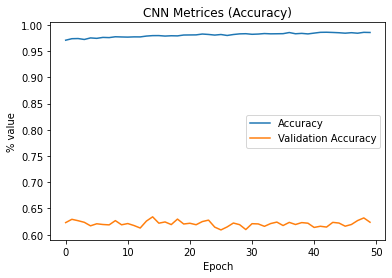

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="left")
plt.show()

Concernant la précision, on peut remarquer que la précision du train et du test est dès la première itération assez élevée (respectivement 97% et 62%).

Cependant, durant les itérations, on remarque des variations, mais pas une nette amélioration. En effet, après 50 itérations, nous sommes à une précision de 98.5% pour le train (soit une progression de 1.5%) et une précision similaire pour le dataset test.

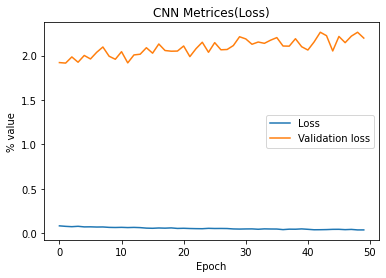

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="left")
plt.show()

Concernant les pertes, on peut remarquer que les pertes durant l'entraînement diminuent en passant de 0.08 à 0.04. Inversement, les pertes du test sont nettement supérieures et augmentent et passent de 1.92 à 2.20

Au vu des ces résultats, et de la différence majeures entre l'entraînement et le test nous pouvons supposer que notre modèle a fait du surapprentissage.

Pour remédier à ça, on peut agrandir l'échantillon d'entraînement et éventuellement augmenter le nombre d'étapes.

Avant d'essayer d'améliorer nos résultats, analysons les résultats obtenus avec ce modèle selon les émotions.

113/113 [==============================] - 10s 93ms/step


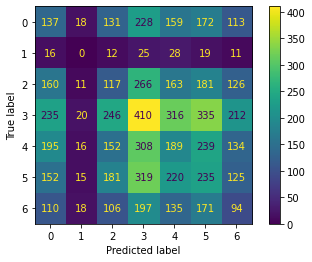


 
 {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}

 
               precision    recall  f1-score   support

           0     0.1363    0.1430    0.1396       958
           1     0.0000    0.0000    0.0000       111
           2     0.1238    0.1143    0.1188      1024
           3     0.2339    0.2311    0.2325      1774
           4     0.1562    0.1533    0.1547      1233
           5     0.1738    0.1885    0.1808      1247
           6     0.1153    0.1131    0.1142       831

    accuracy                         0.1647      7178
   macro avg     0.1342    0.1347    0.1344      7178
weighted avg     0.1640    0.1647    0.1643      7178



In [ ]:
y_pred = CNN.predict(test_generator)

y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

y_actual = test_generator.classes[test_generator.index_array]


cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("\n","\n",test_generator.class_indices)

print("\n","\n",classification_report(y_actual, y_pred_labels, digits=4))

Analyse des émotions :

Les résultats sont décevants. Le modèle ne reconnaît pas sans grande surprise les images de dégoût au vu du pourcentage très faiblement présent dans les datasets.

Cependant, certains résultats sont très étonnants comme les 235 images joyeuses reconnues comme énervée !

Cependant, on remarque que plus il y a d'images dans les jeux de données plus le modèle arrive à prédire plus de bonnes réponses ce qui reste logique.

In [ ]:
#Sauvegarder le modèle
keras_file="CNN.h5"
tf.keras.models.save_model(CNN,keras_file)